# Exploratory analysis
Notebook to experiment with own `api_wrapper` and preliminary analysis

## Imports

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import requests
from IPython.core.display import Image, display

# Own API handler and tools
import mercadolibre as ml

## Styling

In [2]:
# Charts styling
plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
#plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8 # increases figure size
matplotlib.rcParams.update({'font.size': 14}) # increases chart font size
rcParams['font.family'] = 'Arial Narrow'

# Style to enhance df viz, from https://github.com/brandon-rhodes/pycon-pandas-tutorial
from IPython.core.display import HTML
css = open('style/style-table.css').read() #+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Query

In [3]:
# Sets input parameters 
DAYS_AGO = 365              # Days to look back in visits history
ITEMS_TO_QUERY = 200        # Number of itens requested per query (max. permitted by ML is 200)
TOTAL_ITEMS_TO_QUERY = 1000 # Max. number of results to be downloaded ("None" to make it limitless)
ITEMS_TO_PLOT = 10          # List of "ITEMS_TO_PLOT" top sold items; e.g. if 10, visits from top 10 sold itens will be plotted

In [4]:
# Search inputs
_query = 'fonte'
_category = 'MLB5940'

df = ml.get_df_from_query(query=_query, category=_category, \
                       items_per_query=ITEMS_TO_QUERY, total_results_limit=TOTAL_ITEMS_TO_QUERY)

Searching for "fonte" in Acessórios de PC...


100%|██████████| 1000/1000 [00:07<00:00, 126.36it/s]


Initial request sent to API: https://api.mercadolibre.com/sites/MLB/search?limit=1&q=fonte&offset=0&category=MLB5940


In [5]:
df.sort_values('revenue').head()

,title,price,sold_quantity,available_quantity,permalink,thumbnail,seller_address,seller,stop_time,category_id,revenue,start_time,days_ago,city,state,seller_id
id,,,,,,,,,,,,,,,,
MLB674633176,Fonte Para Scanner Hp G3110 - L2698a / L2698ar,38.37,0,5,http://produto.mercadolivre.com.br/MLB-6746331...,http://mlb-s1-p.mlstatic.com/235211-MLB2050732...,"{'city': {'name': 'São Paulo', 'id': 'BR-SP-44...","{'real_estate_agency': False, 'id': 37970286, ...",2036-02-27 00:45:50,MLB243576,0.0,2016-02-27 00:45:50,261,São Paulo,São Paulo,37970286
MLB778277526,Scanner Canon Canonscan Lide 20 Sem Fonte Sem...,25.00,0,1,http://produto.mercadolivre.com.br/MLB-7782775...,http://mlb-s2-p.mlstatic.com/925621-MLB2080846...,"{'city': {'name': 'São Paulo', 'id': 'BR-SP-44...","{'real_estate_agency': False, 'id': 164230456,...",2036-07-05 00:13:57,MLB243590,0.0,2016-07-05 00:13:57,132,São Paulo,São Paulo,164230456
MLB778398614,Gabinete Dell Mini Torre Optiplex 745 Sem Fonte,49.99,0,1,http://produto.mercadolivre.com.br/MLB-7783986...,http://mlb-s2-p.mlstatic.com/943621-MLB2080920...,"{'city': {'name': 'São Paulo', 'id': 'BR-SP-44...","{'real_estate_agency': False, 'id': 50430576, ...",2036-07-05 21:44:56,MLB5917,0.0,2016-07-05 21:44:56,131,São Paulo,São Paulo,50430576
MLB778548912,"Kit Cabo Força Energia Tripolar Fonte 3x1,5mm ...",1000.00,0,5,http://produto.mercadolivre.com.br/MLB-7785489...,http://mlb-s2-p.mlstatic.com/894911-MLB2067052...,"{'city': {'name': 'Curitiba', 'id': 'TUxCQ0NVU...","{'real_estate_agency': False, 'id': 196664084,...",2036-07-06 16:06:26,MLB9566,0.0,2016-07-06 16:06:26,130,Curitiba,Paraná,196664084
MLB778683334,Cabo De Força Tripolar P/ Cpu E Fontes,4.50,0,2,http://produto.mercadolivre.com.br/MLB-7786833...,http://mlb-s2-p.mlstatic.com/685621-MLB2081091...,"{'city': {'name': 'Rio de Janeiro', 'id': 'BR-...","{'real_estate_agency': False, 'id': 86215785, ...",2036-07-06 23:43:58,MLB9566,0.0,2016-07-06 23:43:58,130,Rio de Janeiro,Rio de Janeiro,86215785


In [6]:
ds = df.describe()
ds

,price,sold_quantity,available_quantity,revenue,days_ago
count,744.000000,744.000000,744.000000,744.000000,744.000000
mean,81.245323,29.595430,622.807796,740.296653,237.938172
std,186.034316,177.521015,6353.548288,3112.204861,144.830226
min,1.000000,0.000000,1.000000,0.000000,7.000000
25%,14.187500,0.000000,2.000000,0.000000,108.750000
50%,31.450000,1.000000,7.000000,34.915000,233.500000
75%,75.900000,8.000000,30.000000,261.750000,376.250000
max,2494.000000,3900.000000,99998.000000,39392.120000,489.000000


## Analysis & visualization

In [7]:
query_name, category_name = ml.fix_names_query_category(_query, _category)

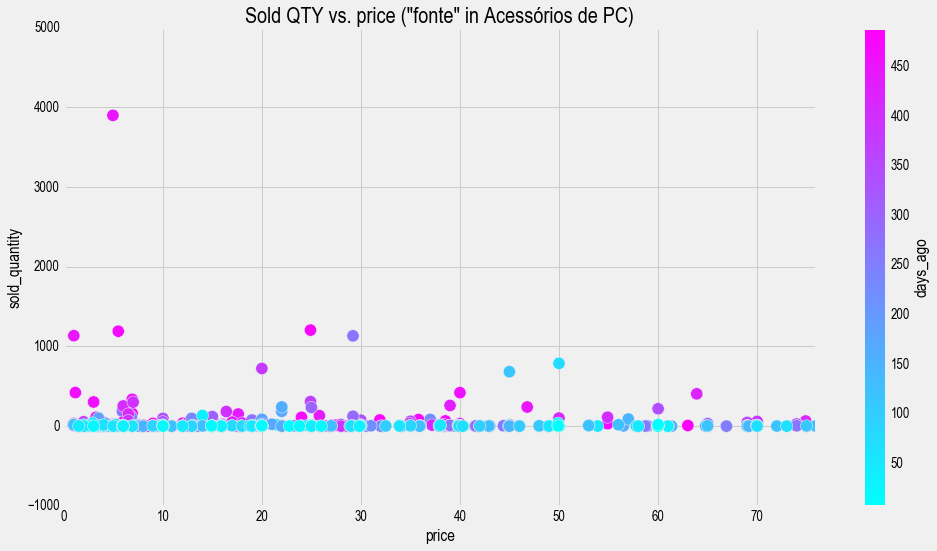

In [8]:
_xlim=(0, ds.loc['75%', 'price'])

df.plot.scatter('price', 'sold_quantity', c='days_ago', cmap='cool', xlim=_xlim, s=150)
plt.title('Sold QTY vs. price ("' + query_name + '"' + ' in ' + category_name + ')', fontsize=22)

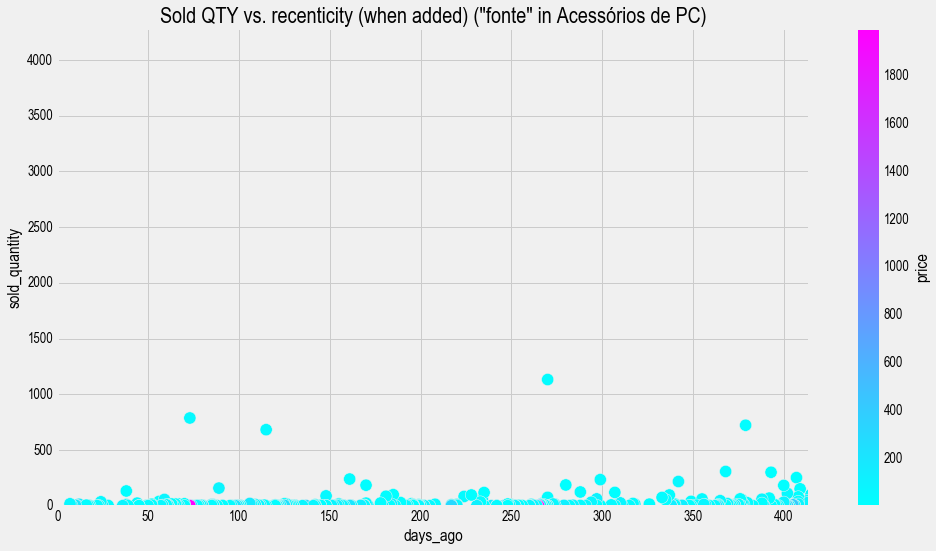

In [9]:
_ymin = ds.loc['25%', 'sold_quantity']

a = df[(df.sold_quantity > _ymin)]

_xlim = (0, ds.loc['75%', 'days_ago']*1.1)
_ylim = (0, ds.loc['max', 'sold_quantity']*1.1)

a.plot.scatter('days_ago', 'sold_quantity', c='price', cmap='cool', xlim=_xlim, ylim=_ylim, s=150)
plt.title('Sold QTY vs. recenticity (when added) ("' + query_name + '"' + ' in ' + category_name + ')', fontsize=22)